In [1]:
import os

In [2]:
import cv2


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams["ps.useafm"] = True

In [7]:
import plotly.express as px

In [8]:
import plotly.graph_objects as go

In [9]:
import seaborn as sns

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.models import Model

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
from tensorflow.keras import backend as K

In [15]:
df_train = pd.read_csv('Dataset/Train.csv')

In [16]:
df_validation = pd.read_csv('Dataset/Validation.csv')

In [17]:
df_train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [18]:
df_train.sample(10)

,FILENAME,IDENTITY
176662,TRAIN_176663.jpg,PIGNON
306964,TRAIN_306965.jpg,CLEMENCE
198238,TRAIN_198239.jpg,DELALANDE
30320,TRAIN_30321.jpg,GABIN
232481,TRAIN_232482.jpg,MEHDI
205200,TRAIN_205201.jpg,ABONNEL
217941,TRAIN_217942.jpg,NEVEU
161473,TRAIN_161474.jpg,SEVIN
111260,TRAIN_111261.jpg,GAROT
179578,TRAIN_179579.jpg,EVAN


In [19]:
df_train.shape

(330961, 2)

In [20]:
print("No of Rows Available in Train Dataset: {0}".format(df_train.shape[0]))

No of Rows Available in Train Dataset: 330961


In [21]:
df_train.isna().sum()

FILENAME      0
IDENTITY    565
dtype: int64

In [22]:
df_train.dropna(inplace=True)

In [23]:
df_train.isna().sum()

FILENAME    0
IDENTITY    0
dtype: int64

In [24]:
df_train.shape

(330396, 2)

In [25]:
print("No of Rows Available in Train Dataset: {0}".format(df_train.shape[0]))

No of Rows Available in Train Dataset: 330396


In [26]:
df_validation.shape

(41370, 2)

In [27]:
print("No of Rows Available in Validation Dataset: {0}".format(df_validation.shape[0]))

No of Rows Available in Validation Dataset: 41370


In [28]:
df_validation.isna().sum()

FILENAME     0
IDENTITY    78
dtype: int64

In [29]:
df_validation.dropna(inplace=True)

In [30]:
print("No of Rows Available in Validation Dataset: {0}".format(df_validation.shape[0]))

No of Rows Available in Validation Dataset: 41292


In [31]:
def draw(path):
    img = cv2.imread(path)
    plt.imshow(img, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()

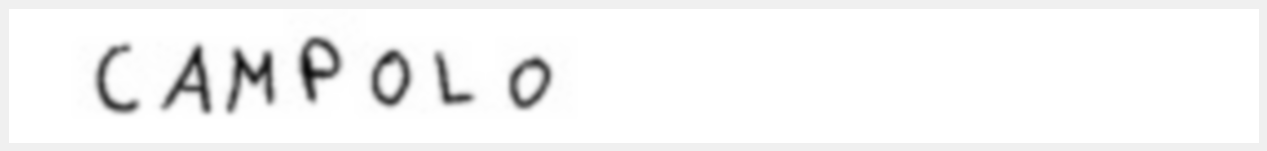

In [32]:
draw("Dataset/Validation/VALIDATION_0125.jpg")

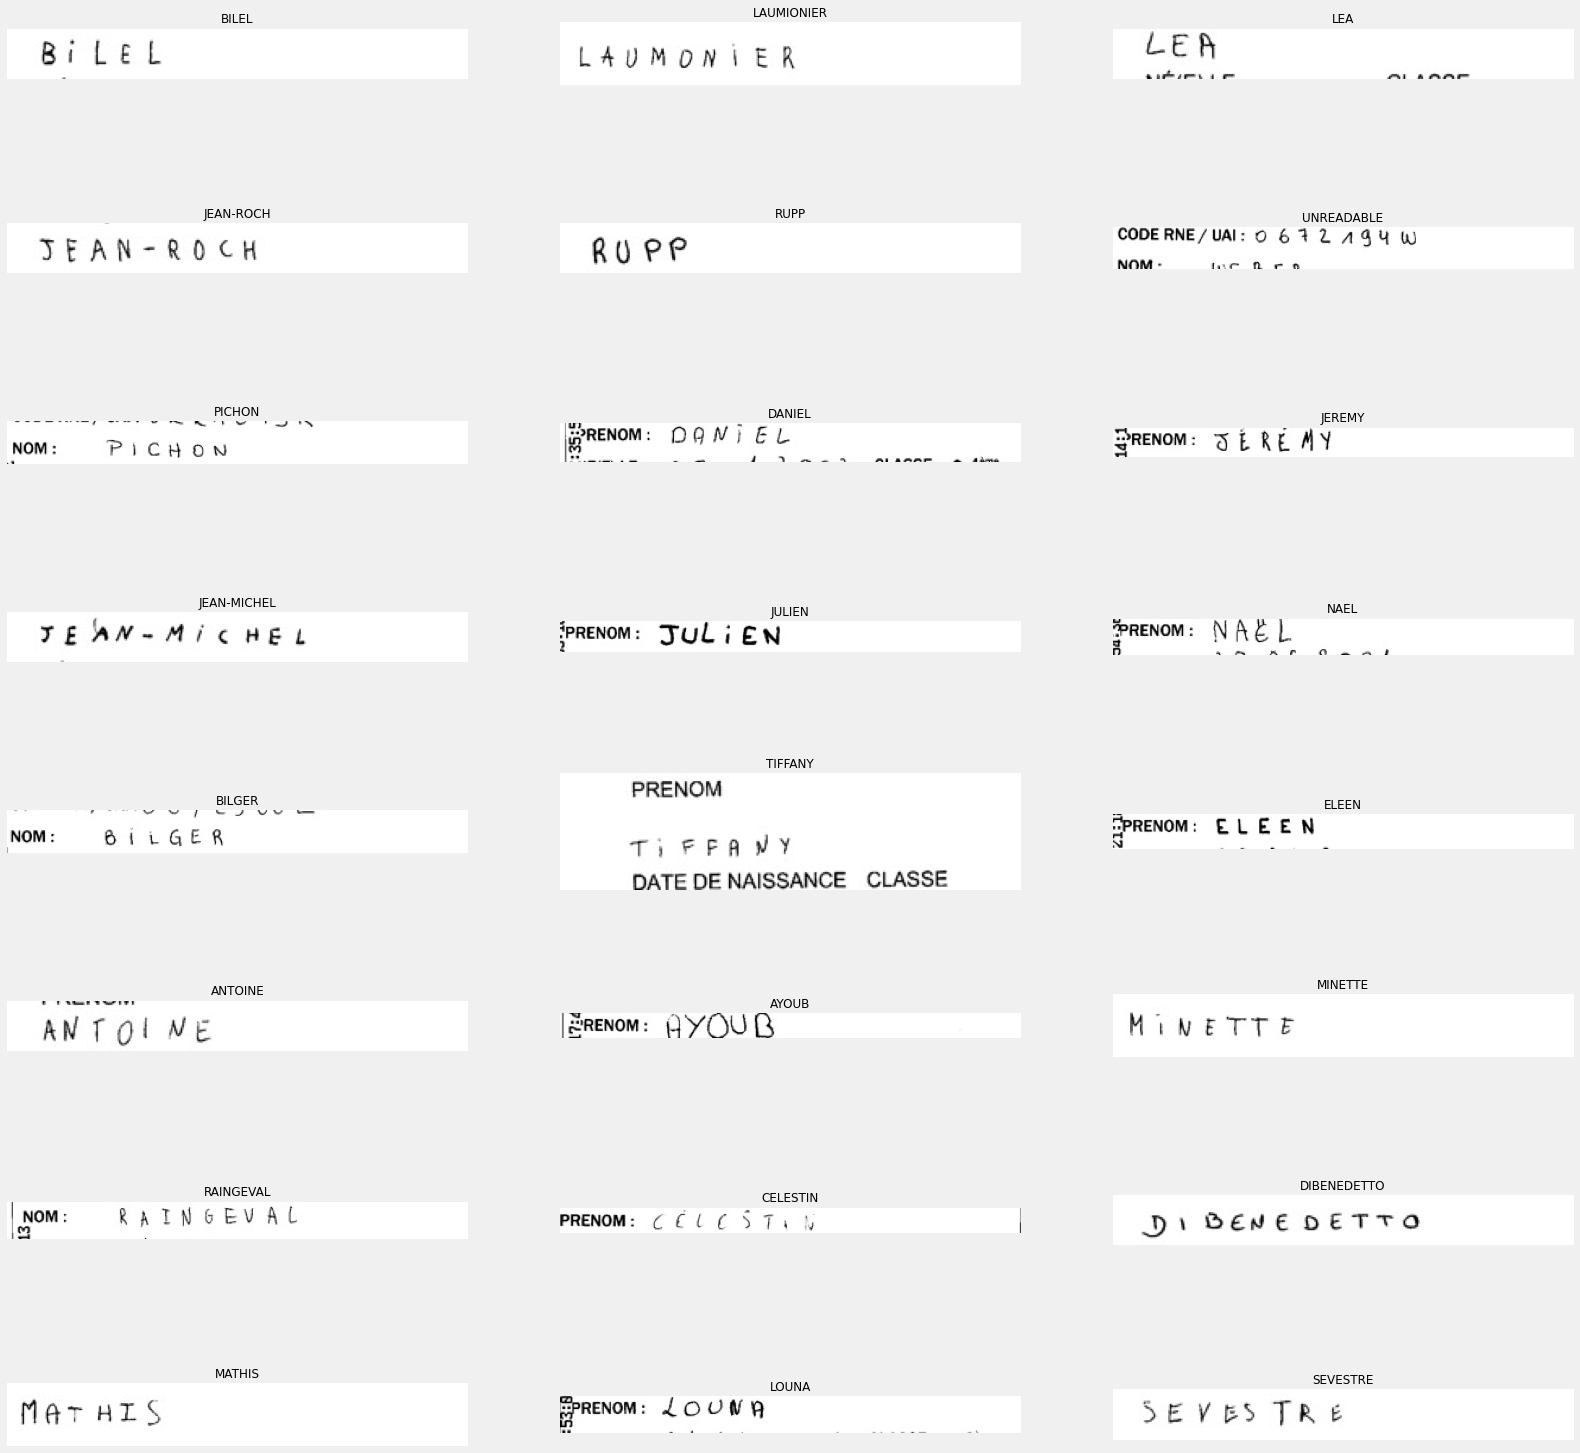

In [33]:
plt.figure(figsize=(25, 40))

for i in range(24):
    ax = plt.subplot(8, 3, i+1)
    img_dir = 'Dataset/Validation/'+df_validation.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(df_validation.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [34]:
print("Number of NaNs in train set      : ", df_train['IDENTITY'].isnull().sum())
print("Number of NaNs in validation set : ", df_validation['IDENTITY'].isnull().sum())

Number of NaNs in train set      :  0
Number of NaNs in validation set :  0


In [35]:
non_readable_df  = df_train[df_train['IDENTITY'] == 'UNREADABLE']

In [36]:
non_readable_df.reset_index(inplace=True)

In [37]:
non_readable_df

,index,FILENAME,IDENTITY
0,806,TRAIN_00807.jpg,UNREADABLE
1,1219,TRAIN_01220.jpg,UNREADABLE
2,2239,TRAIN_02240.jpg,UNREADABLE
3,2860,TRAIN_02861.jpg,UNREADABLE
4,8930,TRAIN_08931.jpg,UNREADABLE
...,...,...,...
97,307023,TRAIN_307024.jpg,UNREADABLE
98,308182,TRAIN_308183.jpg,UNREADABLE
99,310106,TRAIN_310107.jpg,UNREADABLE
100,316011,TRAIN_316012.jpg,UNREADABLE


Dataset/Train/train/TRAIN_00807.jpg
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Dataset/Train/train/TRAIN_01220.jpg
[[ 56 255 248 ... 255 255 255]
 [ 96 253 255 ... 255 255 255]
 [167 254 254 ... 255 255 255]
 ...
 [  7  15 120 ... 255 255 255]
 [191  48   1 ... 255 255 255]
 [249 244 193 ... 255 255 255]]
Dataset/Train/train/TRAIN_02240.jpg
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Dataset/Train/train/TRAIN_02861.jpg
[[  2  95 253 ... 223 173 255]
 [  2 194 255 ... 221 174 254]
 [ 33 238 253 ... 223 178 255]
 ...
 [154 255 252 ...  72 230 255]
 [170 255 254 ...  72 230 255]
 [231 254 253 ...  72 230 255]]
Dataset/Train/train/TRAIN_08931.jpg
[[254 255 254 ... 255 255 255]
 [255 254 255 ... 255

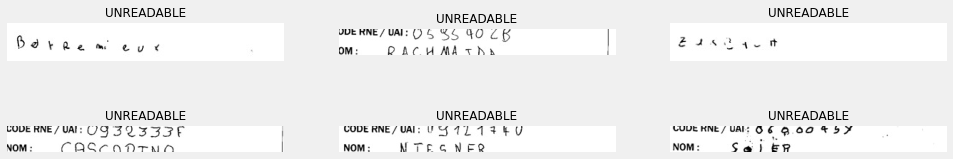

In [38]:
plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'Dataset/Train/train/'+non_readable_df.loc[i, 'FILENAME']
    print(img_dir)
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    print(image)
    plt.imshow(image, cmap = 'gray')
    plt.title(non_readable_df.loc[i, 'IDENTITY'], fontsize = 12)
    plt.axis('off')  
plt.subplots_adjust(wspace = 0.2, hspace = -0.8)

In [39]:
non_readable_df.reset_index(inplace = True, drop = True)

In [40]:
df_validation[df_validation['IDENTITY'] == 'UNREADABLE'].reset_index(inplace = True, drop = True)

In [41]:
df_train.reset_index(inplace = True, drop=True) 
df_validation.reset_index(inplace = True, drop=True)

In [42]:
def image_preprocessing(img):
    (h, w) = img.shape
    final_img = np.ones([64, 256])*255
    if w > 256:
        img = img[:, :256]
    if h > 64:
        img = img[:64, :]
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [43]:
valid_size= 3000

In [44]:
valid_x = []

In [45]:
len(df_validation)

41292

In [46]:
df_validation[250:300]

,FILENAME,IDENTITY
250,VALIDATION_0251.jpg,LILOU
251,VALIDATION_0252.jpg,JULIEN
252,VALIDATION_0253.jpg,THOMAS
253,VALIDATION_0255.jpg,LOUIS
254,VALIDATION_0256.jpg,LEA
255,VALIDATION_0257.jpg,JEAN - XAUIER
256,VALIDATION_0258.jpg,QUENTIN
257,VALIDATION_0259.jpg,COURJON
258,VALIDATION_0260.jpg,LEHU
259,VALIDATION_0261.jpg,HOUGHE


In [47]:
for i in range(valid_size):
    img_dir = 'Dataset/Validation/'+df_validation.loc[i, 'FILENAME']
    print(img_dir)
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255.
    valid_x.append(image)

Dataset/Validation/VALIDATION_0001.jpg
Dataset/Validation/VALIDATION_0002.jpg
Dataset/Validation/VALIDATION_0003.jpg
Dataset/Validation/VALIDATION_0004.jpg
Dataset/Validation/VALIDATION_0005.jpg
Dataset/Validation/VALIDATION_0006.jpg
Dataset/Validation/VALIDATION_0007.jpg
Dataset/Validation/VALIDATION_0008.jpg
Dataset/Validation/VALIDATION_0009.jpg
Dataset/Validation/VALIDATION_0010.jpg
Dataset/Validation/VALIDATION_0011.jpg
Dataset/Validation/VALIDATION_0012.jpg
Dataset/Validation/VALIDATION_0013.jpg
Dataset/Validation/VALIDATION_0014.jpg
Dataset/Validation/VALIDATION_0015.jpg
Dataset/Validation/VALIDATION_0016.jpg
Dataset/Validation/VALIDATION_0017.jpg
Dataset/Validation/VALIDATION_0018.jpg
Dataset/Validation/VALIDATION_0019.jpg
Dataset/Validation/VALIDATION_0020.jpg
Dataset/Validation/VALIDATION_0021.jpg
Dataset/Validation/VALIDATION_0022.jpg
Dataset/Validation/VALIDATION_0023.jpg
Dataset/Validation/VALIDATION_0024.jpg
Dataset/Validation/VALIDATION_0025.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_0220.jpg
Dataset/Validation/VALIDATION_0221.jpg
Dataset/Validation/VALIDATION_0222.jpg
Dataset/Validation/VALIDATION_0223.jpg
Dataset/Validation/VALIDATION_0224.jpg
Dataset/Validation/VALIDATION_0225.jpg
Dataset/Validation/VALIDATION_0226.jpg
Dataset/Validation/VALIDATION_0227.jpg
Dataset/Validation/VALIDATION_0228.jpg
Dataset/Validation/VALIDATION_0229.jpg
Dataset/Validation/VALIDATION_0230.jpg
Dataset/Validation/VALIDATION_0231.jpg
Dataset/Validation/VALIDATION_0232.jpg
Dataset/Validation/VALIDATION_0233.jpg
Dataset/Validation/VALIDATION_0234.jpg
Dataset/Validation/VALIDATION_0235.jpg
Dataset/Validation/VALIDATION_0236.jpg
Dataset/Validation/VALIDATION_0237.jpg
Dataset/Validation/VALIDATION_0238.jpg
Dataset/Validation/VALIDATION_0239.jpg
Dataset/Validation/VALIDATION_0240.jpg
Dataset/Validation/VALIDATION_0241.jpg
Dataset/Validation/VALIDATION_0242.jpg
Dataset/Validation/VALIDATION_0243.jpg
Dataset/Validation/VALIDATION_0244.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_0432.jpg
Dataset/Validation/VALIDATION_0433.jpg
Dataset/Validation/VALIDATION_0434.jpg
Dataset/Validation/VALIDATION_0435.jpg
Dataset/Validation/VALIDATION_0436.jpg
Dataset/Validation/VALIDATION_0437.jpg
Dataset/Validation/VALIDATION_0438.jpg
Dataset/Validation/VALIDATION_0439.jpg
Dataset/Validation/VALIDATION_0440.jpg
Dataset/Validation/VALIDATION_0441.jpg
Dataset/Validation/VALIDATION_0442.jpg
Dataset/Validation/VALIDATION_0443.jpg
Dataset/Validation/VALIDATION_0444.jpg
Dataset/Validation/VALIDATION_0445.jpg
Dataset/Validation/VALIDATION_0446.jpg
Dataset/Validation/VALIDATION_0447.jpg
Dataset/Validation/VALIDATION_0448.jpg
Dataset/Validation/VALIDATION_0449.jpg
Dataset/Validation/VALIDATION_0450.jpg
Dataset/Validation/VALIDATION_0451.jpg
Dataset/Validation/VALIDATION_0452.jpg
Dataset/Validation/VALIDATION_0453.jpg
Dataset/Validation/VALIDATION_0454.jpg
Dataset/Validation/VALIDATION_0455.jpg
Dataset/Validation/VALIDATION_0456.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_0651.jpg
Dataset/Validation/VALIDATION_0652.jpg
Dataset/Validation/VALIDATION_0653.jpg
Dataset/Validation/VALIDATION_0654.jpg
Dataset/Validation/VALIDATION_0655.jpg
Dataset/Validation/VALIDATION_0656.jpg
Dataset/Validation/VALIDATION_0657.jpg
Dataset/Validation/VALIDATION_0658.jpg
Dataset/Validation/VALIDATION_0659.jpg
Dataset/Validation/VALIDATION_0660.jpg
Dataset/Validation/VALIDATION_0661.jpg
Dataset/Validation/VALIDATION_0662.jpg
Dataset/Validation/VALIDATION_0663.jpg
Dataset/Validation/VALIDATION_0664.jpg
Dataset/Validation/VALIDATION_0665.jpg
Dataset/Validation/VALIDATION_0666.jpg
Dataset/Validation/VALIDATION_0667.jpg
Dataset/Validation/VALIDATION_0668.jpg
Dataset/Validation/VALIDATION_0669.jpg
Dataset/Validation/VALIDATION_0670.jpg
Dataset/Validation/VALIDATION_0671.jpg
Dataset/Validation/VALIDATION_0672.jpg
Dataset/Validation/VALIDATION_0673.jpg
Dataset/Validation/VALIDATION_0674.jpg
Dataset/Validation/VALIDATION_0675.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_0865.jpg
Dataset/Validation/VALIDATION_0866.jpg
Dataset/Validation/VALIDATION_0867.jpg
Dataset/Validation/VALIDATION_0868.jpg
Dataset/Validation/VALIDATION_0869.jpg
Dataset/Validation/VALIDATION_0870.jpg
Dataset/Validation/VALIDATION_0871.jpg
Dataset/Validation/VALIDATION_0872.jpg
Dataset/Validation/VALIDATION_0873.jpg
Dataset/Validation/VALIDATION_0874.jpg
Dataset/Validation/VALIDATION_0875.jpg
Dataset/Validation/VALIDATION_0876.jpg
Dataset/Validation/VALIDATION_0877.jpg
Dataset/Validation/VALIDATION_0878.jpg
Dataset/Validation/VALIDATION_0879.jpg
Dataset/Validation/VALIDATION_0880.jpg
Dataset/Validation/VALIDATION_0881.jpg
Dataset/Validation/VALIDATION_0882.jpg
Dataset/Validation/VALIDATION_0883.jpg
Dataset/Validation/VALIDATION_0884.jpg
Dataset/Validation/VALIDATION_0885.jpg
Dataset/Validation/VALIDATION_0886.jpg
Dataset/Validation/VALIDATION_0887.jpg
Dataset/Validation/VALIDATION_0888.jpg
Dataset/Validation/VALIDATION_0889.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_1076.jpg
Dataset/Validation/VALIDATION_1077.jpg
Dataset/Validation/VALIDATION_1078.jpg
Dataset/Validation/VALIDATION_1079.jpg
Dataset/Validation/VALIDATION_1080.jpg
Dataset/Validation/VALIDATION_1081.jpg
Dataset/Validation/VALIDATION_1082.jpg
Dataset/Validation/VALIDATION_1083.jpg
Dataset/Validation/VALIDATION_1084.jpg
Dataset/Validation/VALIDATION_1085.jpg
Dataset/Validation/VALIDATION_1086.jpg
Dataset/Validation/VALIDATION_1087.jpg
Dataset/Validation/VALIDATION_1088.jpg
Dataset/Validation/VALIDATION_1089.jpg
Dataset/Validation/VALIDATION_1090.jpg
Dataset/Validation/VALIDATION_1091.jpg
Dataset/Validation/VALIDATION_1092.jpg
Dataset/Validation/VALIDATION_1093.jpg
Dataset/Validation/VALIDATION_1094.jpg
Dataset/Validation/VALIDATION_1095.jpg
Dataset/Validation/VALIDATION_1096.jpg
Dataset/Validation/VALIDATION_1097.jpg
Dataset/Validation/VALIDATION_1098.jpg
Dataset/Validation/VALIDATION_1099.jpg
Dataset/Validation/VALIDATION_1100.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_1296.jpg
Dataset/Validation/VALIDATION_1297.jpg
Dataset/Validation/VALIDATION_1298.jpg
Dataset/Validation/VALIDATION_1299.jpg
Dataset/Validation/VALIDATION_1300.jpg
Dataset/Validation/VALIDATION_1301.jpg
Dataset/Validation/VALIDATION_1302.jpg
Dataset/Validation/VALIDATION_1303.jpg
Dataset/Validation/VALIDATION_1304.jpg
Dataset/Validation/VALIDATION_1305.jpg
Dataset/Validation/VALIDATION_1306.jpg
Dataset/Validation/VALIDATION_1307.jpg
Dataset/Validation/VALIDATION_1308.jpg
Dataset/Validation/VALIDATION_1309.jpg
Dataset/Validation/VALIDATION_1310.jpg
Dataset/Validation/VALIDATION_1311.jpg
Dataset/Validation/VALIDATION_1312.jpg
Dataset/Validation/VALIDATION_1313.jpg
Dataset/Validation/VALIDATION_1314.jpg
Dataset/Validation/VALIDATION_1315.jpg
Dataset/Validation/VALIDATION_1316.jpg
Dataset/Validation/VALIDATION_1317.jpg
Dataset/Validation/VALIDATION_1318.jpg
Dataset/Validation/VALIDATION_1319.jpg
Dataset/Validation/VALIDATION_1320.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_1516.jpg
Dataset/Validation/VALIDATION_1517.jpg
Dataset/Validation/VALIDATION_1518.jpg
Dataset/Validation/VALIDATION_1519.jpg
Dataset/Validation/VALIDATION_1520.jpg
Dataset/Validation/VALIDATION_1521.jpg
Dataset/Validation/VALIDATION_1522.jpg
Dataset/Validation/VALIDATION_1523.jpg
Dataset/Validation/VALIDATION_1524.jpg
Dataset/Validation/VALIDATION_1525.jpg
Dataset/Validation/VALIDATION_1526.jpg
Dataset/Validation/VALIDATION_1527.jpg
Dataset/Validation/VALIDATION_1528.jpg
Dataset/Validation/VALIDATION_1529.jpg
Dataset/Validation/VALIDATION_1530.jpg
Dataset/Validation/VALIDATION_1531.jpg
Dataset/Validation/VALIDATION_1532.jpg
Dataset/Validation/VALIDATION_1533.jpg
Dataset/Validation/VALIDATION_1534.jpg
Dataset/Validation/VALIDATION_1535.jpg
Dataset/Validation/VALIDATION_1536.jpg
Dataset/Validation/VALIDATION_1537.jpg
Dataset/Validation/VALIDATION_1538.jpg
Dataset/Validation/VALIDATION_1539.jpg
Dataset/Validation/VALIDATION_1540.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_1729.jpg
Dataset/Validation/VALIDATION_1730.jpg
Dataset/Validation/VALIDATION_1731.jpg
Dataset/Validation/VALIDATION_1732.jpg
Dataset/Validation/VALIDATION_1733.jpg
Dataset/Validation/VALIDATION_1734.jpg
Dataset/Validation/VALIDATION_1735.jpg
Dataset/Validation/VALIDATION_1736.jpg
Dataset/Validation/VALIDATION_1737.jpg
Dataset/Validation/VALIDATION_1738.jpg
Dataset/Validation/VALIDATION_1739.jpg
Dataset/Validation/VALIDATION_1740.jpg
Dataset/Validation/VALIDATION_1741.jpg
Dataset/Validation/VALIDATION_1742.jpg
Dataset/Validation/VALIDATION_1743.jpg
Dataset/Validation/VALIDATION_1744.jpg
Dataset/Validation/VALIDATION_1745.jpg
Dataset/Validation/VALIDATION_1746.jpg
Dataset/Validation/VALIDATION_1747.jpg
Dataset/Validation/VALIDATION_1748.jpg
Dataset/Validation/VALIDATION_1749.jpg
Dataset/Validation/VALIDATION_1750.jpg
Dataset/Validation/VALIDATION_1751.jpg
Dataset/Validation/VALIDATION_1752.jpg
Dataset/Validation/VALIDATION_1753.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_1947.jpg
Dataset/Validation/VALIDATION_1948.jpg
Dataset/Validation/VALIDATION_1949.jpg
Dataset/Validation/VALIDATION_1950.jpg
Dataset/Validation/VALIDATION_1951.jpg
Dataset/Validation/VALIDATION_1952.jpg
Dataset/Validation/VALIDATION_1954.jpg
Dataset/Validation/VALIDATION_1955.jpg
Dataset/Validation/VALIDATION_1956.jpg
Dataset/Validation/VALIDATION_1957.jpg
Dataset/Validation/VALIDATION_1958.jpg
Dataset/Validation/VALIDATION_1959.jpg
Dataset/Validation/VALIDATION_1960.jpg
Dataset/Validation/VALIDATION_1961.jpg
Dataset/Validation/VALIDATION_1962.jpg
Dataset/Validation/VALIDATION_1963.jpg
Dataset/Validation/VALIDATION_1964.jpg
Dataset/Validation/VALIDATION_1965.jpg
Dataset/Validation/VALIDATION_1966.jpg
Dataset/Validation/VALIDATION_1967.jpg
Dataset/Validation/VALIDATION_1968.jpg
Dataset/Validation/VALIDATION_1969.jpg
Dataset/Validation/VALIDATION_1970.jpg
Dataset/Validation/VALIDATION_1971.jpg
Dataset/Validation/VALIDATION_1972.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_2160.jpg
Dataset/Validation/VALIDATION_2161.jpg
Dataset/Validation/VALIDATION_2162.jpg
Dataset/Validation/VALIDATION_2163.jpg
Dataset/Validation/VALIDATION_2164.jpg
Dataset/Validation/VALIDATION_2165.jpg
Dataset/Validation/VALIDATION_2166.jpg
Dataset/Validation/VALIDATION_2167.jpg
Dataset/Validation/VALIDATION_2168.jpg
Dataset/Validation/VALIDATION_2169.jpg
Dataset/Validation/VALIDATION_2170.jpg
Dataset/Validation/VALIDATION_2171.jpg
Dataset/Validation/VALIDATION_2172.jpg
Dataset/Validation/VALIDATION_2173.jpg
Dataset/Validation/VALIDATION_2174.jpg
Dataset/Validation/VALIDATION_2175.jpg
Dataset/Validation/VALIDATION_2176.jpg
Dataset/Validation/VALIDATION_2177.jpg
Dataset/Validation/VALIDATION_2178.jpg
Dataset/Validation/VALIDATION_2179.jpg
Dataset/Validation/VALIDATION_2180.jpg
Dataset/Validation/VALIDATION_2181.jpg
Dataset/Validation/VALIDATION_2182.jpg
Dataset/Validation/VALIDATION_2183.jpg
Dataset/Validation/VALIDATION_2184.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_2381.jpg
Dataset/Validation/VALIDATION_2382.jpg
Dataset/Validation/VALIDATION_2383.jpg
Dataset/Validation/VALIDATION_2384.jpg
Dataset/Validation/VALIDATION_2385.jpg
Dataset/Validation/VALIDATION_2386.jpg
Dataset/Validation/VALIDATION_2387.jpg
Dataset/Validation/VALIDATION_2388.jpg
Dataset/Validation/VALIDATION_2389.jpg
Dataset/Validation/VALIDATION_2390.jpg
Dataset/Validation/VALIDATION_2391.jpg
Dataset/Validation/VALIDATION_2392.jpg
Dataset/Validation/VALIDATION_2393.jpg
Dataset/Validation/VALIDATION_2394.jpg
Dataset/Validation/VALIDATION_2395.jpg
Dataset/Validation/VALIDATION_2396.jpg
Dataset/Validation/VALIDATION_2397.jpg
Dataset/Validation/VALIDATION_2398.jpg
Dataset/Validation/VALIDATION_2399.jpg
Dataset/Validation/VALIDATION_2400.jpg
Dataset/Validation/VALIDATION_2401.jpg
Dataset/Validation/VALIDATION_2402.jpg
Dataset/Validation/VALIDATION_2403.jpg
Dataset/Validation/VALIDATION_2404.jpg
Dataset/Validation/VALIDATION_2405.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_2592.jpg
Dataset/Validation/VALIDATION_2593.jpg
Dataset/Validation/VALIDATION_2594.jpg
Dataset/Validation/VALIDATION_2595.jpg
Dataset/Validation/VALIDATION_2596.jpg
Dataset/Validation/VALIDATION_2597.jpg
Dataset/Validation/VALIDATION_2598.jpg
Dataset/Validation/VALIDATION_2599.jpg
Dataset/Validation/VALIDATION_2600.jpg
Dataset/Validation/VALIDATION_2601.jpg
Dataset/Validation/VALIDATION_2602.jpg
Dataset/Validation/VALIDATION_2603.jpg
Dataset/Validation/VALIDATION_2604.jpg
Dataset/Validation/VALIDATION_2605.jpg
Dataset/Validation/VALIDATION_2606.jpg
Dataset/Validation/VALIDATION_2607.jpg
Dataset/Validation/VALIDATION_2608.jpg
Dataset/Validation/VALIDATION_2609.jpg
Dataset/Validation/VALIDATION_2610.jpg
Dataset/Validation/VALIDATION_2611.jpg
Dataset/Validation/VALIDATION_2612.jpg
Dataset/Validation/VALIDATION_2613.jpg
Dataset/Validation/VALIDATION_2614.jpg
Dataset/Validation/VALIDATION_2615.jpg
Dataset/Validation/VALIDATION_2616.jpg
Dataset/Validation/VALIDA

Dataset/Validation/VALIDATION_2804.jpg
Dataset/Validation/VALIDATION_2805.jpg
Dataset/Validation/VALIDATION_2806.jpg
Dataset/Validation/VALIDATION_2807.jpg
Dataset/Validation/VALIDATION_2808.jpg
Dataset/Validation/VALIDATION_2809.jpg
Dataset/Validation/VALIDATION_2810.jpg
Dataset/Validation/VALIDATION_2811.jpg
Dataset/Validation/VALIDATION_2812.jpg
Dataset/Validation/VALIDATION_2813.jpg
Dataset/Validation/VALIDATION_2814.jpg
Dataset/Validation/VALIDATION_2815.jpg
Dataset/Validation/VALIDATION_2816.jpg
Dataset/Validation/VALIDATION_2817.jpg
Dataset/Validation/VALIDATION_2818.jpg
Dataset/Validation/VALIDATION_2819.jpg
Dataset/Validation/VALIDATION_2820.jpg
Dataset/Validation/VALIDATION_2821.jpg
Dataset/Validation/VALIDATION_2822.jpg
Dataset/Validation/VALIDATION_2823.jpg
Dataset/Validation/VALIDATION_2824.jpg
Dataset/Validation/VALIDATION_2825.jpg
Dataset/Validation/VALIDATION_2826.jpg
Dataset/Validation/VALIDATION_2827.jpg
Dataset/Validation/VALIDATION_2828.jpg
Dataset/Validation/VALIDA

In [48]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24 
num_of_characters = len(alphabets) + 1 
num_of_timestamps = 64
batch_size = 128

In [49]:
def label_to_num(label):
    label_num = []
    for ch in label:
            label_num.append(alphabets.find(ch) if alphabets.find(ch)!=-1 else alphabets.find('-'))
    return np.array(label_num)

In [50]:
name = 'DATA'
print(name, '\n',label_to_num(name))

DATA 
 [ 3  0 19  0]


In [51]:
def image_generator(path):
    for row, val in  df_train.iterrows(): 
        img_dir = os.path.join("Dataset/Train/train", val['FILENAME'])
        image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
        image = image_preprocessing(image)[..., np.newaxis]
        image = image/255.
        if image.shape !=(256,64,1):
            break
        if (len(val['IDENTITY'])>max_str_len):
            continue
        labels = label_to_num(val['IDENTITY'])    
        yield (image, labels)

In [52]:
dataset = tf.data.Dataset.from_generator(lambda: image_generator("Dataset/train/train/"), (tf.float32, tf.float32))

In [53]:
def foo(*val):
    xl = val[0]
    lab = val[1]
    lab_len = len(lab)
    one_pad = -tf.ones((max_str_len - lab_len))#*(-1)
    y = tf.concat([lab, one_pad], -1)
    return xl, y, [num_of_timestamps-2], [lab_len], [0]

In [54]:
dataset = dataset.map(foo).batch(batch_size)
dataset_final = dataset.map(lambda *x: (x[0:-1],x[-1]))

In [55]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

In [56]:
for i in range(valid_size):
    valid_label_len[i] = len(df_validation.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(df_validation.loc[i, 'IDENTITY'])]= label_to_num(df_validation.loc[i, 'IDENTITY']) 

In [57]:
y_pred = None

In [58]:
def create_model():
    input_data = Input(shape=(256, 64, 1), name='input')
    inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)
    inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
    inner = Dropout(0.3)(inner)
    inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
    inner = Dropout(0.3)(inner)
    inner = Reshape(target_shape=((num_of_timestamps, 1024)), name='reshape')(inner)
    inner = Dense(num_of_timestamps, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)
    inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
    inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)
    inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
    y_pred = Activation('softmax', name='softmax')(inner)
    model = Model(inputs=input_data, outputs=y_pred)
    return model, input_data, y_pred

In [59]:
model, input_data, y_pred = create_model()

In [60]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [61]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

In [62]:
ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

In [63]:
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [64]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))

In [ ]:
model_final.fit(dataset_final, epochs=8,verbose=1)

Epoch 1/8
     69/Unknown - 1092s 16s/step - loss: 24.3362

In [ ]:
preds = model.predict(valid_x)

In [ ]:
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

In [ ]:
prediction = []

In [ ]:
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
y_true = valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

In [ ]:
for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 

In [ ]:
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

In [ ]:
test_df = pd.read_csv('Dataset/Test.csv')

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'Dataset/Test/test/'+test_df.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)